# 常微分方程式の数値計算
## Juliaによる4次のRunge-Kutta 法の実装例

常微分方程式の初期値問題
$$ 
u'(t) = u(t)^2 + 1, \quad u(0) = 0 
$$
を4次のRunge-Kutta法で解く．  

計算区間は$[0,T]$とし，$N$等分する．

In [53]:
f(t, u) = u^2 + 1   # 厳密解は u(t) = tan(t) + u(0)

function rk4(f, U0;T, N, log=true)
    h = T/N
    U = U0
    Uhist = U
    for t in 0:h:T-h
        k1 = f(t, U)
        k2 = f(t+h/2, U+h/2*k1)
        k3 = f(t+h/2, U+h/2*k2)
        k4 = f(t+h, U+h*k3)
        U += h/6*(k1+2k2+2k3+k4)
        Uhist = hcat(Uhist, U)

        (log == true) && println("u($(t+h)) = $U")
    end
    return Uhist
end

rk4(f, 0.0; T=pi/4, N=20);

u(0.039269908169872414) = 0.03929010622989858
u(0.07853981633974483) = 0.07870170528184771
u(0.11780972450961724) = 0.11835779736280481
u(0.15707963267948966) = 0.1583844373591264
u(0.19634954084936207) = 0.1989123637940663
u(0.23561944901923448) = 0.24007875496342812
u(0.2748893571891069) = 0.2820291637683544
u(0.3141592653589793) = 0.3249196914248136
u(0.3534291735288517) = 0.36891947220395377
u(0.39269908169872414) = 0.41421355758552786
u(0.43196898986859655) = 0.461006310020652
u(0.47123889803846897) = 0.5095254457857342
u(0.5105088062083414) = 0.560026905843723
u(0.5497787143782138) = 0.6128007870407974
u(0.5890486225480862) = 0.6681786388853684
u(0.6283185307179586) = 0.7265425316577356
u(0.667588438887831) = 0.7883364416317036
u(0.7068583470577035) = 0.8540806966856553
u(0.7461282552275759) = 0.9243905078717003
u(0.7853981633974483) = 1.0000000219675438


## ベクトル値関数版

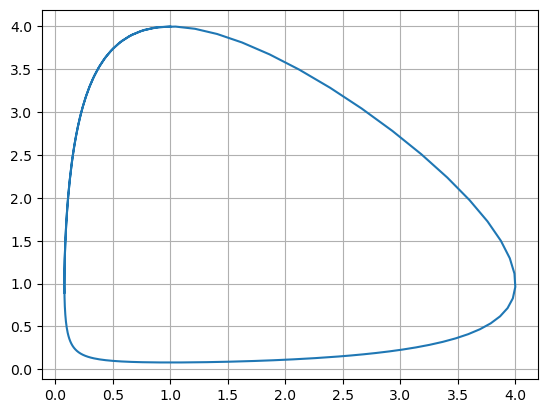

In [54]:
# グラフ描画
using PyPlot 

f(t, u) =[u[1]*(1-u[2]), -u[2]*(1-u[1])]
Uhist = rk4(f, [1, 4], T=10, N = 200, log = false)
cla()   # キャンバスクリア
plot(Uhist[1,:],Uhist[2,:],marker=nothing)
grid()
display(gcf())